<a href="https://colab.research.google.com/github/biswa-13/DataScience/blob/master/DS2_ANN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This notebook going to demonstrate a step by step overview of Bank Customer Continuity Prediction, 
# here we are going to perform the Predictive Analysis  with the Artficial Neural Network and 
# finally we will aslo perform the hyper parameter tunning.
# Reference: 
# - https://github.com/krishnaik06/Complete-Deep-Learning/blob/master/ANN/ann.py
# - https://www.youtube.com/watch?v=OTTOglLJxLU&list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi&index=17

# Steps:
# - Download the dataset from https://github.com/biswa-13/DataScience/blob/master/datasets/bank_customer_details.csv
# - Explore the data and remove the columns which are not going to help in our prediction
# - Then convert the categorical data into numerical data
# - Prepare the training and testing dataset
# - Create an ANN model
# - Compile and Train the model
# - Test the model
# - Perform HyperPArameter tunning

In [ ]:
!pip install keras

In [109]:
# importing required libraries for handling the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# required libraries for ANN
import keras
from keras.models import Sequential
from keras.layers import Layer, Dense, LeakyReLU, Dropout

print("Finish: Importing of libraries...")

Finish: Importing of libraries...


In [97]:
# Load the dataset
dataset3 = pd.read_csv("sample_data/bank_customer_details.csv")
print("Finish: Load the dataset...")

Finish: Load the dataset...


In [98]:
# Expolre the dataset
dataset3.info()
# dataset.head()
# We can find that we have below mentioned columns 
## RowNumber	CustomerId	Surname	CreditScore	Geography	
## Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	
## IsActiveMember	EstimatedSalary	Exited
# among which "Exited" is the dependent variable and others are independent variables.
# here we have clean non-null data in every column therefore we dont need perform the Imputation,
# instead we can dircetly jump towards removing the unwanted columns 
# and converting the categorical feature into numerial feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
sbn.countplot(x=("Geography"),hue="Gender", data=dataset3)

In [ ]:
# Formatting data
new_geography = pd.get_dummies(dataset3['Geography'], drop_first=True)
new_geography.info()
# new_geography.head()
new_gender = pd.get_dummies(dataset3["Gender"], drop_first=True)
new_gender.info()
# new_gender.head()
# removing the unwanted columns like "CustomerId", "Surname"
dataset3.drop(["RowNumber","CustomerId", "Surname", "Geography", "Gender"], axis=1, inplace= True)
dataset3.info()
print("Finish: Formatting data...")

In [ ]:
# preparing the final dataset

dataset3 = pd.concat([dataset3, new_geography, new_gender], axis=1)
dataset3.info()
dataset3.head()
print("Finish: preparing the final dataset..." )

In [ ]:
# preparing training and testig dataset
train_input,  test_input, train_output, test_output = train_test_split(
    dataset3.drop(["Exited"], axis=1),
    dataset3["Exited"],
    test_size = .30,
    random_state = 101
)
train_input.info()
test_input.info()
train_output.head()
test_output.head()
print("Finish: preparing training and testig dataset...")

In [102]:
# Feature Scaling
sc = StandardScaler()
train_input = sc.fit_transform(train_input)
test_input = sc.fit_transform(test_input)
print("Finish: Feature Scaling...")

Finish: Feature Scaling...


In [103]:
# Creating the ANN model

model = Sequential()
# adding the first hidden layer
model.add(Dense(units=6, input_dim=11, activation="relu", kernel_initializer='he_uniform' ))

# adding the second hidden layer
model.add(Dense(units=6, activation="relu", kernel_initializer="he_uniform"  ))

# adding the output layer
model.add(Dense(units=1, activation = "sigmoid", kernel_initializer= "glorot_uniform"))

print("Finish: Creating the ANN model...")

Finish: Creating the ANN model...


In [104]:
# Compiling the model
summary = model.compile(
    optimizer="Adamax",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
print("Finish:  Compiling the model...")

Finish:  Compiling the model...


In [ ]:
# Training the model
history = model.fit(
    x = train_input,
    y = train_output,
    batch_size = 20,
    epochs=90,
    validation_split=.23,

)

print("Finish: # Training the model...")

In [111]:
# Plotting the accuracy graph
def plotGraph(history, string):
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.legend(['train','test'])
  plt.show()

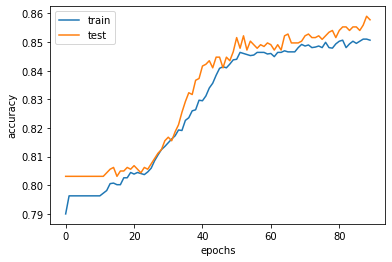

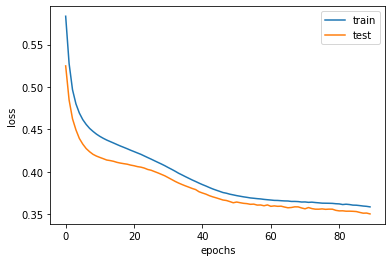

In [112]:
# Demonstrating the accuracy of the model
plotGraph(history,"accuracy")
plotGraph(history,"loss")



In [114]:
# Accuracy measurement of the model
pred_reslt = model.predict(test_input)
pred_reslt = (pred_reslt > 0.5)
# Confusion Matrix
conf_mtrx = confusion_matrix(test_output, pred_reslt)

# Accuracy Score
acc_score = accuracy_score(test_output, pred_reslt)

print("Confusion Matrix -->",conf_mtrx)
print("Accuracy Score -->",acc_score)

Confusion Matrix --> [[2286   92]
 [ 356  266]]
Accuracy Score --> 0.8506666666666667
